https://en.wikipedia.org/wiki/List_of_Bollywood_films_of_1920

In [ ]:
url = "https://en.wikipedia.org/wiki/List_of_Bollywood_films_of_2020"

In [1]:
import pandas as pd
from tqdm import tqdm
import re

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [ ]:
df = pd.DataFrame()
yr_range = range(1920,2022)
# url_fstr = f"https://en.wikipedia.org/wiki/List_of_Bollywood_films_of_{}"

In [ ]:
for yr in tqdm(yr_range):
    url = f"https://en.wikipedia.org/wiki/List_of_Bollywood_films_of_{yr}"
    df_curr_list = pd.read_html(url, attrs={"class": "wikitable"})
    for df_curr in df_curr_list:
        try:
            df_curr_to_copy = df_curr[df_curr.columns & ['Title', 'Director', 'Cast', 'Genre', 'Notes/Music', 'Music', 'Notes']]
            df_curr_to_copy['year'] = yr
            df = pd.concat([df, df_curr_to_copy])
        except:
            print(f"Columns not found, available columns are --> {df_curr.columns.tolist()}")
            print(f"Relevant URL --> {url}")
            continue

In [ ]:
df[df['Notes'].notnull()]

In [ ]:
df

In [ ]:
df.shape

In [ ]:
df.describe(include='all')

In [ ]:
df.to_csv('./cast_director_data.csv', index=False)

## load cached data

In [3]:
df = pd.read_csv('./cast_director_data.csv')

In [28]:
bucket_years = 5

In [43]:
df_copy = df.copy()

In [44]:
def split_names(names):
    if "," not in names:
        return re.sub( r"([A-Z])", r" \1", names).replace("  ", "_").strip().replace(" ", ", ").replace("_", " ")
    else:
        return names

In [45]:
df_copy['Director'] = df_copy['Director'].fillna('').apply(lambda names: split_names(names))

In [46]:
df_copy

Title  \
0                        Balika Badhu a.k.a. Baby Bride   
1                      Daksha Yagna a.k.a. Sati Parvati   
2             Jalandhar Vrinda a.k.a. Sati Tulsi Vrinda   
3             Kansa Vadha a.k.a. End Of The Tyrant King   
4     Katorabhar Khoon a.k.a.The Stinger Stung a.k.a...   
...                                                 ...   
9554                             Kabhi Eid Kabhi Diwali   
9555                                                NaN   
9556                                        Heropanti 2   
9557                                            Maidaan   
9558                                                NaN   

                                Director  \
0     P. T. Shaida, (, Tulsidutt Shaida)   
1                     Vishnupant Divekar   
2                             G. V. Sane   
3                             G. V. Sane   
4                         S. N. Patankar   
...                                  ...   
9554                        Farhad Samji   
9555                                       
9556                          Ahmed Khan   
9557                         Amit Sharma   
9558                                       

                                                   Cast      Genre  year  \
0       Miss Ali, Tarak Bagcha, Pandit Tulsidutt Shaida     Social  1920   
1                                Khalil, Prabha, Vaidya  Mythology  1920   
2                                                   NaN  Mythology  1920   
3                                                   NaN  Mythology  1920   
4     Trymbakrao Pradhan, Tara Koregaonkar, Baba Vya...     Social  1920   
...                                                 ...        ...   ...   
9554                             Salman KhanPooja Hegde        NaN  2021   
9555                                                NaN        NaN  2021   
9556                                       Tiger Shroff        NaN  2021   
9557                                Ajay DevgnPriyamani        NaN  2021   
9558                                                NaN        NaN  2021   

     Notes Notes/Music Music  
0      NaN         NaN   NaN  
1      NaN         NaN   NaN  
2      NaN         NaN   NaN  
3      NaN         NaN   NaN  
4      NaN         NaN   NaN  
...    ...         ...   ...  
9554   NaN         NaN   NaN  
9555   NaN         NaN   NaN  
9556   NaN         NaN   NaN  
9557   NaN         NaN   NaN  
9558   NaN         NaN   NaN  

[9559 rows x 8 columns]

## director

In [47]:
df_director = df_copy[['Director', 'year']].copy()

df_director['year'] = df_director['year'].map(lambda yr: yr - (yr-df_director['year'].min())%bucket_years)

df_director['Director'] = df_director['Director'].apply(lambda names: names.split(', '))

df_director = df_director.explode('Director').reset_index(drop=True)

df_director['Director'] = df_director['Director'].apply(lambda names: names.replace("(", "").replace(")", ""))

df_director['strlen'] = df_director['Director'].map(lambda c: len(c))
df_director = df_director[df_director['strlen']>=3]

df_director['count'] = 1
df_director = df_director[['year', 'Director', 'count']]

df_director = df_director.groupby(['year', 'Director']).sum().reset_index()

In [54]:
color_dict = {0:'#adb0ff',
             1:'#adb0ff',
             2:'#adb0ff',
             3:'#ffb3ff',
             4:'#ffb3ff',
             5:'#ffb3ff',
             6:'#90d595',
             7:'#90d595',
             8:'#90d595',
             9:'#90d595'}

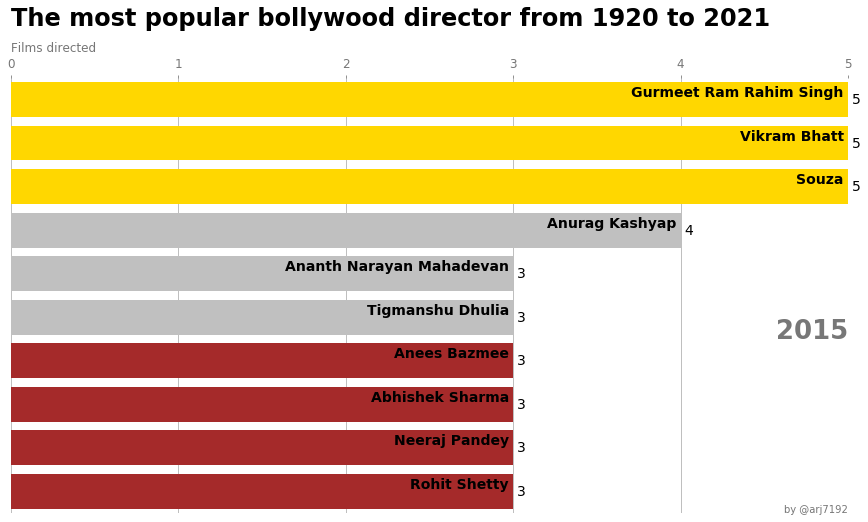

In [101]:
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(df, year, col_name):
    dff = df[df['year'].eq(year)].sort_values(by='count', ascending=True).tail(10)
    ax.clear()
    ax.barh(dff[col_name], dff['count'], color= ['brown']*4 + ['silver']*3 +  ['gold']*3)
#     ax.barh(dff[col_name], dff['count'])
#     dx = dff['count'].max() / 200
    dx = dff['count'].max() / 200
    for i, (value, name) in enumerate(zip(dff['count'], dff[col_name])):
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
#         ax.text(value-dx, i-.25, group_lk[name], size=10, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, f"{year}", transform=ax.transAxes, color='#777777', 
            size=26, ha='right', weight=800)
    ax.text(0, 1.06, 'Films directed', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, f'The most popular bollywood {col_name.lower()} from 1920 to 2021',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by @arj7192', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)
    
draw_barchart(df_director, 2015, 'Director')

In [59]:
def draw_barchart_director(yr):
    return draw_barchart(df_director, yr, 'Director')

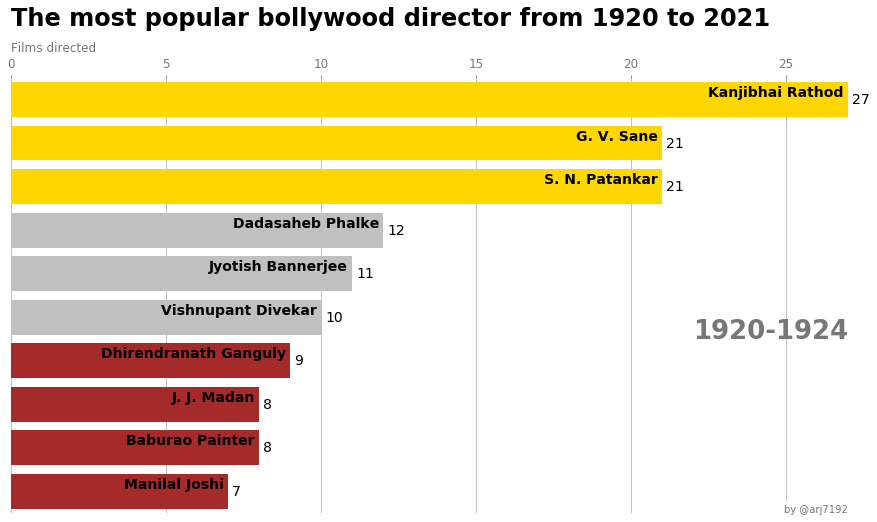

In [60]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart_director, frames=range(1920, 2021, bucket_years))
HTML(animator.to_jshtml()) 

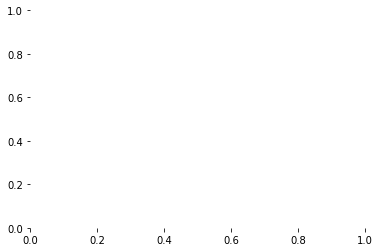

In [61]:
FFwriter = animation.FFMpegWriter()
animator.save('animation_director.mp4', writer = FFwriter)

## cast

In [69]:
df_cast = df_copy[['Cast', 'year']].copy()

df_cast['year'] = df_cast['year'].map(lambda yr: yr - (yr-df_cast['year'].min())%bucket_years)

df_cast['Cast'].fillna('', inplace=True)

df_cast['Cast'] = df_cast['Cast'].apply(lambda names: names.split(', '))

df_cast = df_cast.explode('Cast').reset_index(drop=True)

df_cast['Cast'] = df_cast['Cast'].apply(lambda names: names.replace("(", "").replace(")", ""))

df_cast['strlen'] = df_cast['Cast'].map(lambda c: len(c))
df_cast = df_cast[df_cast['strlen']>=3]

df_cast['count'] = 1
df_cast = df_cast[['year', 'Cast', 'count']]

In [70]:
df_cast['Cast'] = df_cast['Cast'].apply(lambda names: split_names(names))

In [71]:
df_cast['Cast'] = df_cast['Cast'].apply(lambda names: names.split(', '))

df_cast = df_cast.explode('Cast').reset_index(drop=True)

df_cast['Cast'] = df_cast['Cast'].apply(lambda names: names.replace("(", "").replace(")", ""))

df_cast['strlen'] = df_cast['Cast'].map(lambda c: len(c))
df_cast = df_cast[df_cast['strlen']>=3]

df_cast['count'] = 1
df_cast = df_cast[['year', 'Cast', 'count']]

df_cast = df_cast.groupby(['year', 'Cast']).sum().reset_index()

In [72]:
def draw_barchart_cast(yr):
    return draw_barchart(df_cast, yr, 'Cast')

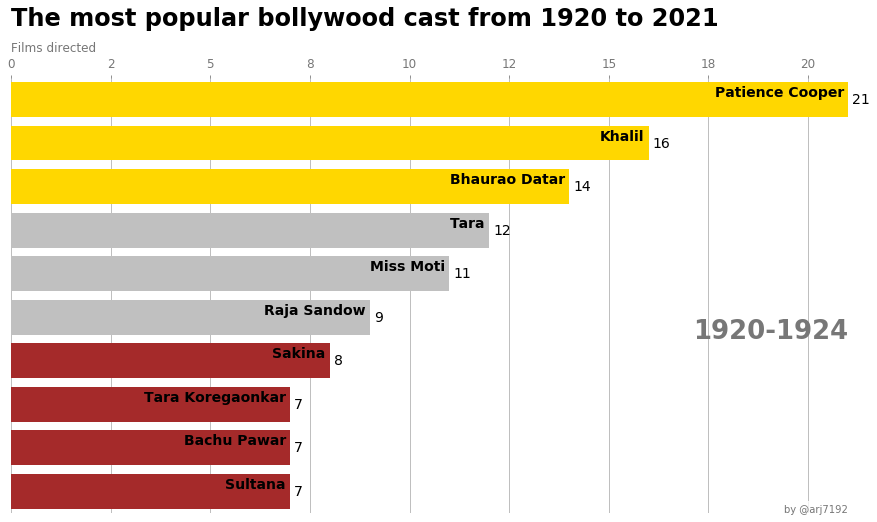

In [73]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart_cast, frames=range(1920, 2021, bucket_years))
HTML(animator.to_jshtml()) 

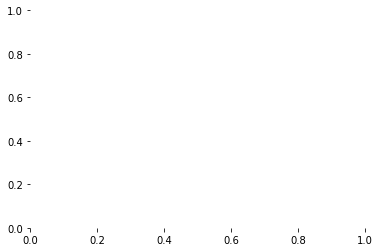

In [74]:
FFwriter = animation.FFMpegWriter()
animator.save('animation_cast.mp4', writer = FFwriter)

## genre

In [119]:
bucket_years = 2

In [120]:
df_genre = df_copy[['Genre', 'year']].copy()

df_genre['year'] = df_genre['year'].map(lambda yr: yr - (yr-df_genre['year'].min())%bucket_years)

df_genre['Genre'].fillna('', inplace=True)

df_genre['Genre'] = df_genre['Genre'].apply(lambda names: names.replace('/', ' ').replace(',', ' ').split())

df_genre = df_genre.explode('Genre').reset_index(drop=True)

df_genre['Genre'] = df_genre['Genre'].fillna('').apply(lambda names: names.replace("(", "").replace(")", "").lower())

df_genre['strlen'] = df_genre['Genre'].map(lambda c: len(c))
df_genre = df_genre[df_genre['strlen']>=2]

df_genre['count'] = 1
df_genre = df_genre[['year', 'Genre', 'count']]

df_genre = df_genre.groupby(['year', 'Genre']).sum().reset_index()

In [121]:
def draw_barchart_genre(yr):
    return draw_barchart(df_genre, yr, 'Genre')

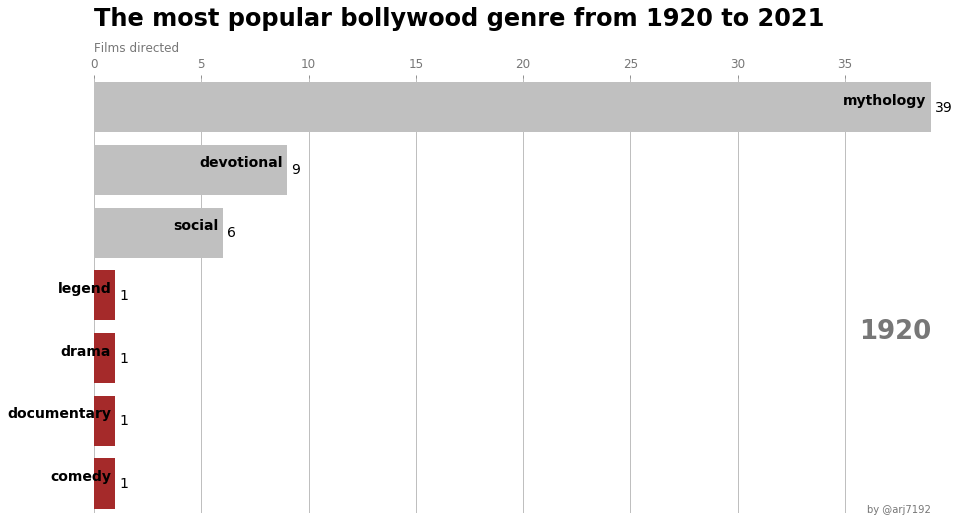

In [122]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart_genre, frames=range(df_genre.year.min(), df_genre.year.max()+1,
                                                                         bucket_years),
                                  interval=500)
HTML(animator.to_jshtml()) 

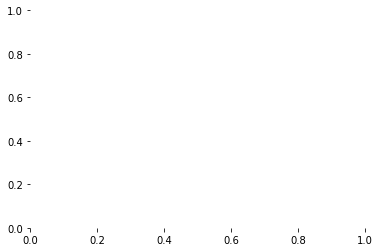

In [123]:
FFwriter = animation.FFMpegWriter()
animator.save('animation_genre.mp4', writer = FFwriter, dpi=80)